# Assignment

## Import Library

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from minisom import MiniSom
from skimage import io

## 1. Gunakan data `Mall_Customers.csv`

In [2]:
data = pd.read_csv('./data/Mall_Customers.csv')

## 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [3]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

## 3. Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

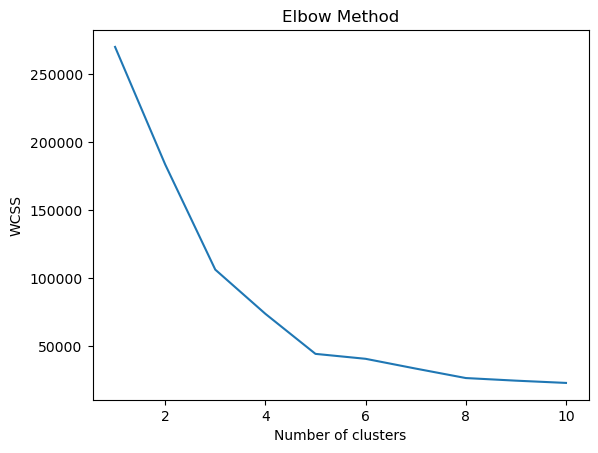

In [4]:
# determine the value of k using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# elbow method visualization
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

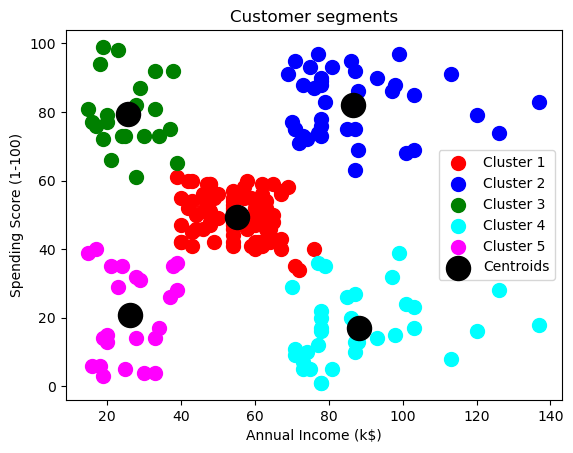

In [7]:
# visualize the clusters
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [11]:
# Function to initialize SOM weights
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [12]:
# Function to calculate the distance between the input vector and SOM weights
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [13]:
# Function to find the winning unit (the unit with the closest weight)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape) 

In [14]:
# Function to update SOM weights
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    # Calculate the distance from the winner unit to all other units
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    # Calculate the influence of the neighborhood function based on distance
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    # Update the weights with the learning rate and neighborhood influence
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [15]:
# Function to train the SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    # SOM size corresponds to the number of color channels
    som_shape = (10, 10, input_shape[2])  
    weights = initialize_weights(input_shape, som_shape)

    # Training loop for the given number of epochs
    for epoch in range(num_epochs):
        # Update learning rate and neighborhood radius with exponential decay
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Process each pixel in the image
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                # Find the winning SOM unit for the current pixel
                winner = find_winner_unit_in_image(input_vector, weights)
                # Update the weights of the SOM based on the winner
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [16]:
# Load the dog image you uploaded
image_path = './data/dog.png'
dog_image = io.imread(image_path) / 255.0  # Normalize pixel intensities to the range [0, 1]

In [17]:
# Train the SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(dog_image, num_epochs, initial_learning_rate, initial_neighborhood_radius)

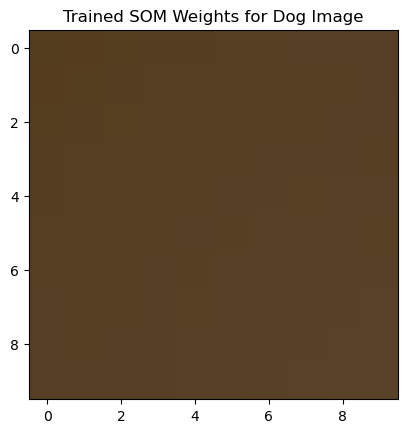

In [18]:
# Visualize the trained SOM weights
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Dog Image')
plt.show()